# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [3]:
import math

N = 10000 #The number of customers
d = 10 # The number of ads
ads_selected = [] # The ads selcted in each round
number_of_selections = [0]*d#This list will help us to figure which ad is selcted
#more 
sum_of_rewards = [0]*d #The sum of the reward of each ad
total_reward = 0 # This will count the total number of ads selected

for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
      if number_of_selections[i] > 0 :
        avg_reward = sum_of_rewards[i] / number_of_selections[i]
        delta_i = math.sqrt((3/2)*(math.log(n + 1) / number_of_selections[i]))
        upper_bound = avg_reward + delta_i
      
      else:
        upper_bound = 1e400
      if (upper_bound > max_upper_bound):
        max_upper_bound = upper_bound
        ad = i

  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sum_of_rewards[ad] += reward
  total_reward+= reward

## Visualising the results

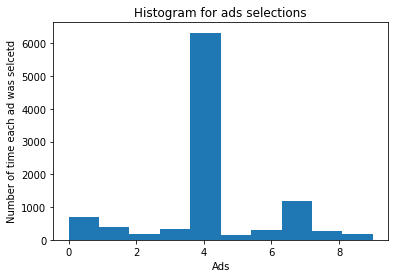

In [4]:
plt.hist(ads_selected)
plt.title("Histogram for ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of time each ad was selcetd")
plt.show()